In [0]:
import keras
import sys, os, shutil
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
from keras import regularizers
from keras.utils.np_utils import to_categorical
import csv
from itertools import islice
from math import ceil
import numpy as np
from keras import regularizers
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Emotion Dataset/fer2013.csv')

In [0]:
# Simplify the emotions
l1 = data.loc[data['emotion'] == 0]  # Angry
l2 = data.loc[data['emotion'] == 3]  # Happy
l3 = data.loc[data['emotion'] == 4]  # Sad
l4 = data.loc[data['emotion'] == 6]  # Nuetral

light = pd.concat([l1,l2,l3,l4])

In [0]:
# Fix values
light.emotion.loc[(light['emotion'] == 3)] = 1
light.emotion.loc[(light['emotion'] == 4)] = 2
light.emotion.loc[(light['emotion'] == 6)] = 3

# re-shuffle
light = shuffle(light)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
training_data = light[light['Usage'].isin(['Training'])]
testing_data = light[light['Usage'].isin(['PublicTest'])]


In [0]:
print(training_data.shape, testing_data.shape)

(21005, 3) (2622, 3)


In [0]:
train_data = training_data.iloc[:,1]
train_labels = training_data.iloc[:,0]
test_data = testing_data.iloc[:,1]
test_labels = testing_data.iloc[:,0]

In [0]:
# convert string into int and normalize data
X_train = []
X_test = []
for row in range(len(train_data)):
  temp = np.fromstring(train_data.iloc[row], dtype=int, sep=" ").reshape((48, 48, 1))
  temp = temp/255.
  temp = np.array(temp)
  X_train.append(temp)
  
for row in range(len(test_data)):
  temp = np.fromstring(test_data.iloc[row], dtype=int, sep=" ").reshape((48, 48, 1))
  temp = temp/255.
  temp = np.array(temp)
  X_test.append(temp)
  
X_train = np.array(X_train)
Y_train = np.array(train_labels)
X_test = np.array(X_test)
Y_test = np.array(test_labels)

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(21005, 48, 48, 1)
(21005,)
(2622, 48, 48, 1)
(2622,)


In [0]:
# List of labels
emotion_table = {'0' : 'anger',     # 4953
                 '1' : 'happy',     # 8989
                 '2' : 'sad',       # 6077
                 '3' : 'neutral'}   # 6198

# Setup important information for the model
num_classes = len(emotion_table)
batch_size = 128
epochs = 25

# Labels
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)
input_shape = (48, 48, 1)

In [0]:
# Load Model --------------------------------------------------------
model = load_model('facial_expressions_l2_0.001.h5')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
import cv2
import os
import glob

In [0]:
preds = model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2622/2622 [==============================] - 3s 1ms/step
Loss = 0.8627956876947532
Test Accuracy = 0.6666666665302716


AxesImage(54,36;334.8x217.44)
[[0.00302353 0.887332   0.00107139 0.04377482]]
happy


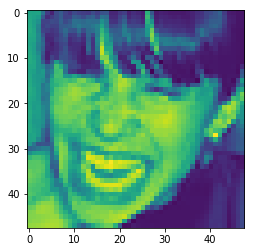

In [0]:
# Select image and print it
image = X_test[330]
show = np.reshape(image, (48, 48))
show.shape
print(plt.imshow(show))

# Prediction
image = np.reshape(image, (1, 48, 48, 1))
pred = model.predict(image)
print(pred)
p = np.amax(pred)
for i in range(len(pred[0])):
  if(p == pred[0][i]):
    i = str(i)
    print(emotion_table[i])

In [0]:
img_path = 'WhatsApp Image 2019-09-15 at 2.57.08 PM.jpeg'
image = cv2.imread(img_path)
imgplot = plt.imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = cv2.resize(gray,(48 ,48))
x = np.array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x = np.reshape(x, (1, 48, 48, 1))
print('Input image shape:', x.shape)
# Prediction
pred = model.predict(x)
print(pred)
p = np.amax(pred)
for i in range(len(pred[0])):
  if(p == pred[0][i]):
    i = str(i)
    print(emotion_table[i])

In [0]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Read the input image
img = cv2.imread('WhatsApp Image 2019-09-15 at 2.57.08 PM.jpeg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
crop_img = []
print(len(faces))
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    crop_img.append(img[y:y+h, x:x+w])
# Display the output
import matplotlib.pyplot as plt
# for image in range(len(crop_img)):
plt.imshow(img)

gray = cv2.cvtColor(crop_img[0], cv2.COLOR_BGR2GRAY)
img = cv2.resize(gray,(48 ,48))
x = np.array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x = np.reshape(x, (1, 48, 48, 1))
print('Input image shape:', x.shape)

# Prediction
pred = model.predict(x)
print(pred)
p = np.amax(pred)
for i in range(len(pred[0])):
  if(p == pred[0][i]):
    i = str(i)
    print(emotion_table[i])
